**Итоговая работа**

1. Загрузить файл HR.csv в pandas dataframe

In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import plotly.express as px

In [190]:
HR = pd.read_csv('/content/drive/MyDrive/Итоговая работа Python/HR.csv')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Для удобства восприятия переименуем столбцы.

In [191]:
HR.rename(columns = {'satisfaction_level':'Удовлетворенность_работой','last_evaluation': 'Последняя_оценка','number_project': 'Кол-во_проектов',\
                             'average_montly_hours':'Среднее_количество_часов','time_spend_company':'Стаж_работы','Work_accident':'Несчастный_случай',\
                             'left':'Увольнение','promotion_last_5years':'Повышение_сотрудника', 'department':'Отдел','salary':'Уровень_зарплаты'}, inplace = True)
HR.head()

,Удовлетворенность_работой,Последняя_оценка,Кол-во_проектов,Среднее_количество_часов,Стаж_работы,Несчастный_случай,Увольнение,Повышение_сотрудника,Отдел,Уровень_зарплаты
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитать основные статистики для переменных
(среднее, медиана, мода, мин/макс, сред.отклонение)

In [163]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Удовлетворенность_работой  14999 non-null  float64
 1   Последняя_оценка           14999 non-null  float64
 2   Кол-во_проектов            14999 non-null  int64  
 3   Среднее_количество_часов   14999 non-null  int64  
 4   Стаж_работы                14999 non-null  int64  
 5   Несчастный_случай          14999 non-null  int64  
 6   Увольнение                 14999 non-null  int64  
 7   Повышение_сотрудника       14999 non-null  int64  
 8   Отдел                      14999 non-null  object 
 9   Уровень_зарплаты           14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [164]:
HR.isnull().sum()

Удовлетворенность_работой    0
Последняя_оценка             0
Кол-во_проектов              0
Среднее_количество_часов     0
Стаж_работы                  0
Несчастный_случай            0
Увольнение                   0
Повышение_сотрудника         0
Отдел                        0
Уровень_зарплаты             0
dtype: int64

Непрерывные величины в столбцах: "Удовлетворенность_работой", "Последняя_оценка", "Среднее_количество_часов".

Определим базовые статистики численных данных непрерывных величин.

In [165]:
HR[['Удовлетворенность_работой', 'Последняя_оценка', 'Среднее_количество_часов']].describe()

,Удовлетворенность_работой,Последняя_оценка,Среднее_количество_часов
count,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,201.050337
std,0.248631,0.171169,49.943099
min,0.090000,0.360000,96.000000
25%,0.440000,0.560000,156.000000
50%,0.640000,0.720000,200.000000
75%,0.820000,0.870000,245.000000
max,1.000000,1.000000,310.000000


Пропусков нет, данные корректные.

Категориальные данные в столбцах: 'Несчастный_случай', 'Увольнение', 'Повышение_сотрудника', 'Отдел', 'Уровень_зарплаты', 'Кол-во_проектов', 'Стаж_работы'.

Для категориальных данных определим следующие характеристики:

Мода

In [166]:
print('Происходили ли несчастные случаи на рабочем месте с сотрудником:', HR['Несчастный_случай'].mode()[0])
print('Уволился ли сотрудник:', HR['Увольнение'].mode()[0])
print('Повышался ли сотрудник за последние пять лет:', HR['Повышение_сотрудника'].mode()[0])
print('Отдел в котором работает сотрудник:', HR['Отдел'].mode()[0])
print('Относительный уровень зарплаты:', HR['Уровень_зарплаты'].mode()[0])
print('Количество проектов, выполненных за время работы:', HR['Кол-во_проектов'].mode()[0])
print('Стаж работы в компании в годах:', HR['Стаж_работы'].mode()[0])

Происходили ли несчастные случаи на рабочем месте с сотрудником: 0
Уволился ли сотрудник: 0
Повышался ли сотрудник за последние пять лет: 0
Отдел в котором работает сотрудник: sales
Относительный уровень зарплаты: low
Количество проектов, выполненных за время работы: 4
Стаж работы в компании в годах: 3


In [167]:
HR.describe(include='object')

,Отдел,Уровень_зарплаты
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [168]:
print(HR['Несчастный_случай'].unique())

[0 1]


In [169]:
HR['Несчастный_случай'].value_counts()

0    12830
1     2169
Name: Несчастный_случай, dtype: int64

In [170]:
print(HR['Увольнение'].unique())

[1 0]


In [171]:
HR['Увольнение'].value_counts()

0    11428
1     3571
Name: Увольнение, dtype: int64

In [172]:
print(HR['Повышение_сотрудника'].unique())

[0 1]


In [173]:
HR['Повышение_сотрудника'].value_counts()

0    14680
1      319
Name: Повышение_сотрудника, dtype: int64

In [174]:
print(HR['Отдел'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


In [175]:
HR['Отдел'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Отдел, dtype: int64

In [176]:
print(HR['Уровень_зарплаты'].unique())

['low' 'medium' 'high']


In [177]:
HR['Уровень_зарплаты'].value_counts()

low       7316
medium    6446
high      1237
Name: Уровень_зарплаты, dtype: int64

In [178]:
print(HR['Кол-во_проектов'].unique())

[2 5 7 6 4 3]


In [179]:
HR['Кол-во_проектов'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: Кол-во_проектов, dtype: int64

In [180]:
print(HR['Стаж_работы'].unique())

[ 3  6  4  5  2  8 10  7]


In [181]:
HR['Стаж_работы'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: Стаж_работы, dtype: int64

3. Рассчитать и визуализировать корреляционную матрицу для
количественных переменных.
Определить две самые скоррелированные и две наименее
скоррелированные переменные.

In [192]:
corr_matrix_HR = HR[['Удовлетворенность_работой', 'Последняя_оценка', 'Среднее_количество_часов', 'Кол-во_проектов', 'Стаж_работы']].corr()
corr_matrix_HR

,Удовлетворенность_работой,Последняя_оценка,Среднее_количество_часов,Кол-во_проектов,Стаж_работы
Удовлетворенность_работой,1.000000,0.105021,-0.020048,-0.142970,-0.100866
Последняя_оценка,0.105021,1.000000,0.339742,0.349333,0.131591
Среднее_количество_часов,-0.020048,0.339742,1.000000,0.417211,0.127755
Кол-во_проектов,-0.142970,0.349333,0.417211,1.000000,0.196786
Стаж_работы,-0.100866,0.131591,0.127755,0.196786,1.000000


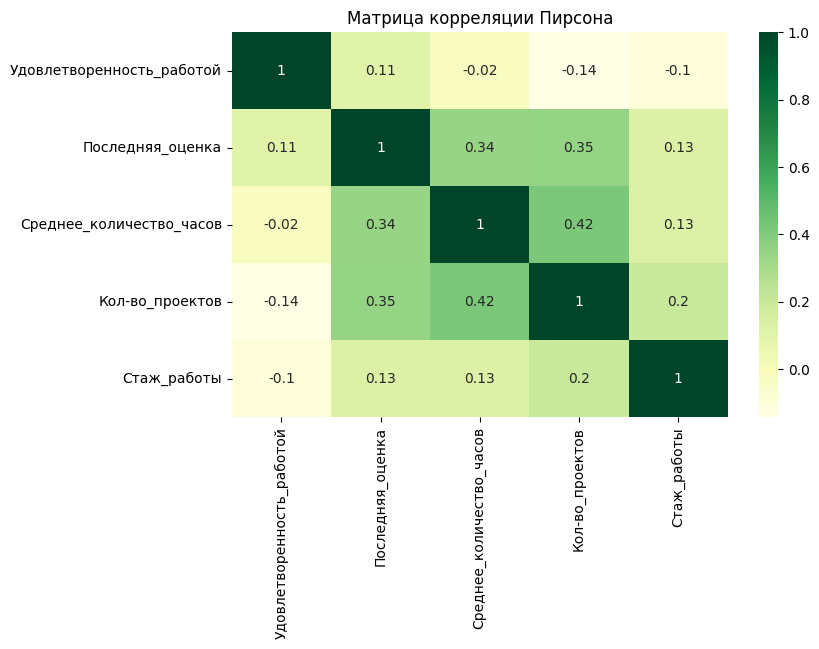

In [246]:
plt.figure(figsize=[8, 5])
sns.heatmap(corr_matrix_HR, annot=True, cmap='YlGn')
plt.title ("Матрица корреляции Пирсона")
plt.show()

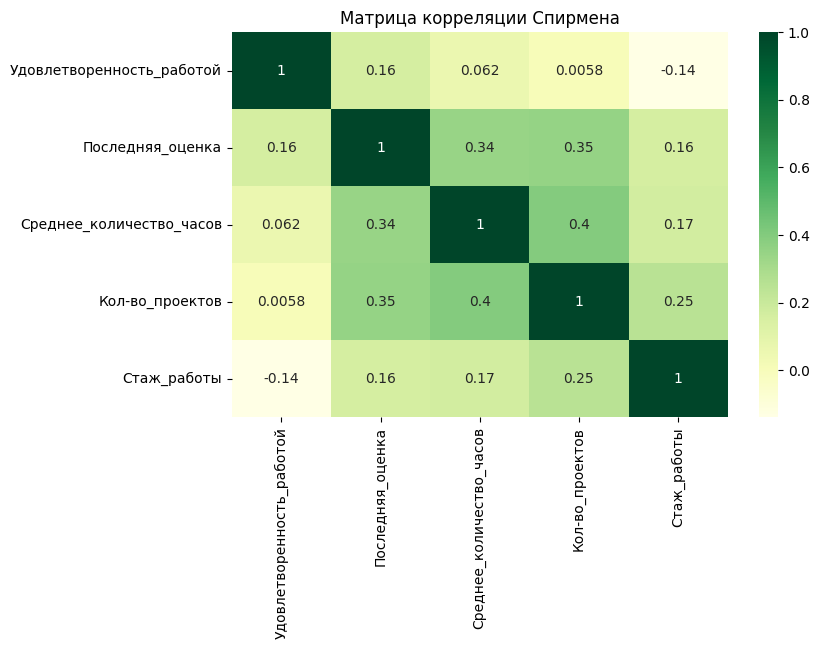

In [247]:
corr_matrix_spearman = HR[['Удовлетворенность_работой', 'Последняя_оценка', 'Среднее_количество_часов', 'Кол-во_проектов', 'Стаж_работы']].corr('spearman')
plt.figure(figsize=[8, 5])
sns.heatmap(corr_matrix_spearman, annot=True, cmap="YlGn")
plt.title("Матрица корреляции Спирмена")
plt.show()

Согласно полученной матрице корреляции можно сделать вывод, что взаимосвязь между параметрами "Удовлетворенность_работой" и "Стаж_работы" самая слабая, наибольшая же взаимосвязь наблюдается между параметрами "Количество_проектов" и "Среднее_количество_часов".

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [424]:
HR0 = HR.groupby('Отдел')['Отдел'].count()
HR0 = HR0.to_frame(name = 'Количество сотрудников департаментов')
HR0

,Количество сотрудников департаментов
Отдел,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


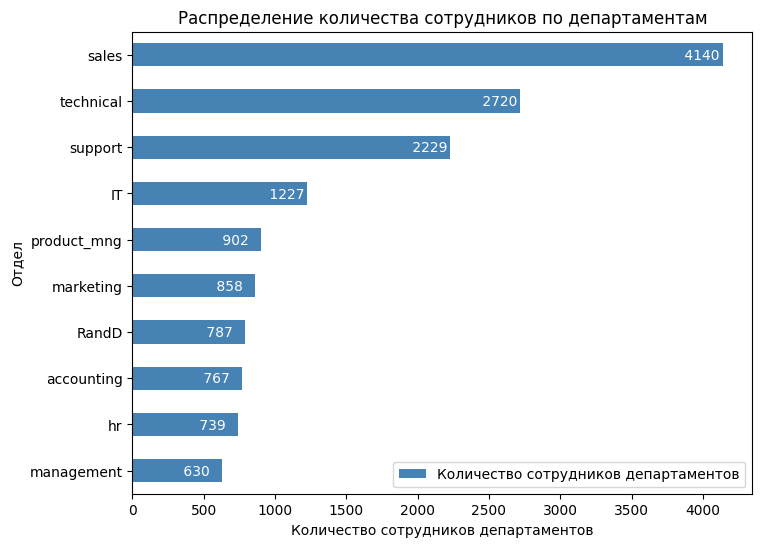

In [249]:
HR0 = HR0.sort_values(by = 'Количество сотрудников департаментов')
HR0.plot(kind='barh', figsize=(8, 6), color='steelblue')

for index, value in enumerate(HR0['Количество сотрудников департаментов']):
    label = format(int(value), ' ')
    plt.annotate(label, xy=(value-300, index-0.1), color='white')
plt.title ('Распределение количества сотрудников по департаментам')
plt.xlabel('Количество сотрудников департаментов')
plt.ylabel('Отдел')

plt.show()

5. Показать распределение сотрудников по зарплатам.

In [438]:
HR00 = HR.groupby('Уровень_зарплаты')['Уровень_зарплаты'].count()
HR00 = HR00.to_frame(name = 'Количество зарплат разного уровня')
HR00

,Количество зарплат разного уровня
Уровень_зарплаты,
high,1237
low,7316
medium,6446


<Axes: title={'center': 'Распределение сотрудников компании по уровню зарплаты'}, ylabel='Уровень_зарплаты'>

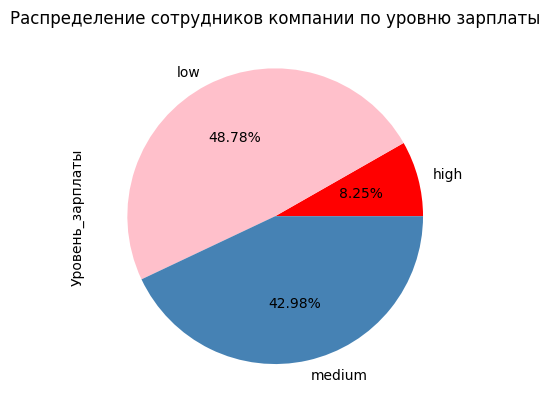

In [436]:
HR.groupby('Уровень_зарплаты')['Уровень_зарплаты'].count().plot(kind='pie', y='Уровень_зарплаты', autopct='%1.2f%%',
colors = ['red', 'pink', 'steelblue'],
title='Распределение сотрудников компании по уровню зарплаты')

6. Посмотрим распределение сотрудников по зарплатам в каждом
департаменте по отдельности

In [437]:
HR1 = (HR.groupby(['Отдел', 'Уровень_зарплаты']).count()['Последняя_оценка']).to_frame(name='Количество зарплат разного уровня')
HR1

Количество зарплат разного уровня
Отдел       Уровень_зарплаты                                   
IT          high                                             83
            low                                             609
            medium                                          535
RandD       high                                             51
            low                                             364
            medium                                          372
accounting  high                                             74
            low                                             358
            medium                                          335
hr          high                                             45
            low                                             335
            medium                                          359
management  high                                            225
            low                                             180
            medium                                          225
marketing   high                                             80
            low                                             402
            medium                                          376
product_mng high                                             68
            low                                             451
            medium                                          383
sales       high                                            269
            low                                            2099
            medium                                         1772
support     high                                            141
            low                                            1146
            medium                                          942
technical   high                                            201
            low                                            1372
            medium                                         1147

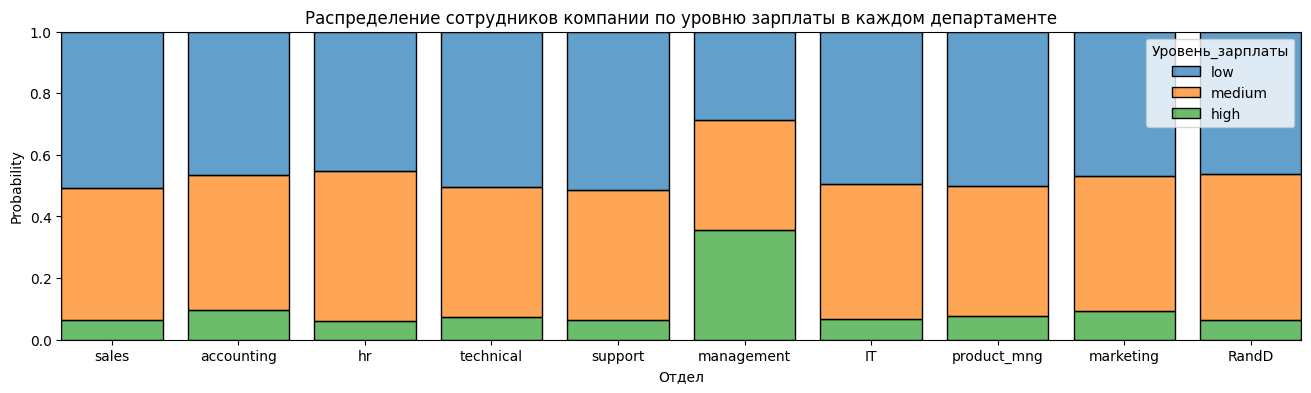

In [439]:
fig, axes = plt.subplots(1, 1, figsize=(16, 4))

for i, col in enumerate(['Отдел']):
  plot = sns.histplot(HR, x=col, hue='Уровень_зарплаты', stat="probability", multiple="fill", shrink=.8, alpha=0.7)
plt.title('Распределение сотрудников компании по уровню зарплаты в каждом департаменте')

plt.show()

In [440]:
HR_1 = pd.pivot_table(data=HR1, index='Уровень_зарплаты', columns='Отдел', values='Количество зарплат разного уровня', aggfunc='mean')
HR_1

Отдел,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Уровень_зарплаты,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


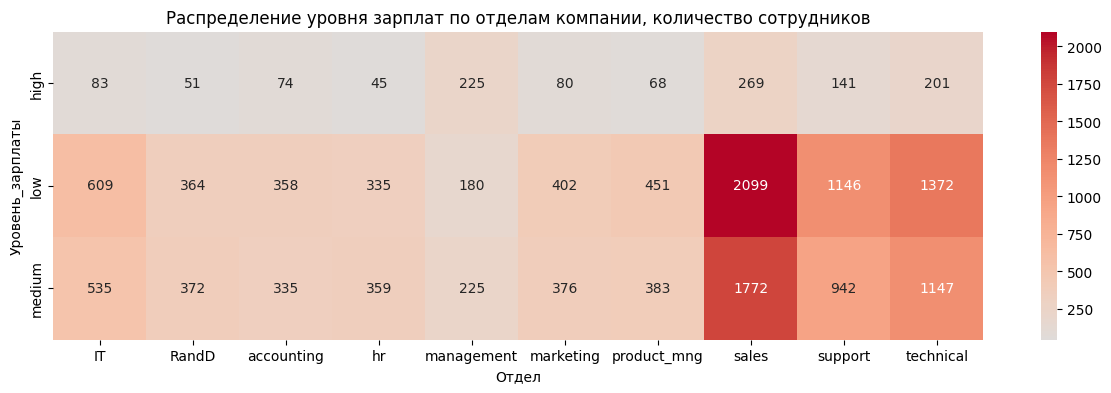

In [441]:
plt.figure(figsize=[15, 4])
sns.heatmap(HR_1, annot=True, cmap='coolwarm', center=0.117, fmt="d", annot_kws={"size":10})
plt.title("Распределение уровня зарплат по отделам компании, количество сотрудников")
plt.show()

Из визуализации делаем вывод, что большее количество высоких и низких заработных плат наблюдается у сотрудников отдела "Sales", что связано с тем, что в этом отделе работает наибольшее число сотрудников компании.

Чтобы определить, в каком отделе компании самые высокие и самые низкие заработные платы, необходимо рассчитать соотношение общей численнности сотрудников отдела к количеству сотрудников отдела, получающих высокую и низкую зарплату.

In [442]:
HR_extr = HR_1.div(HR0['Количество сотрудников департаментов'], axis=1)*100
HR_extr

Отдел,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
Уровень_зарплаты,,,,,,,,,,
high,6.764466,6.480305,9.647979,6.089310,35.714286,9.324009,7.538803,6.497585,6.325707,7.389706
low,49.633252,46.251588,46.675359,45.331529,28.571429,46.853147,50.000000,50.700483,51.413190,50.441176
medium,43.602282,47.268107,43.676662,48.579161,35.714286,43.822844,42.461197,42.801932,42.261104,42.169118


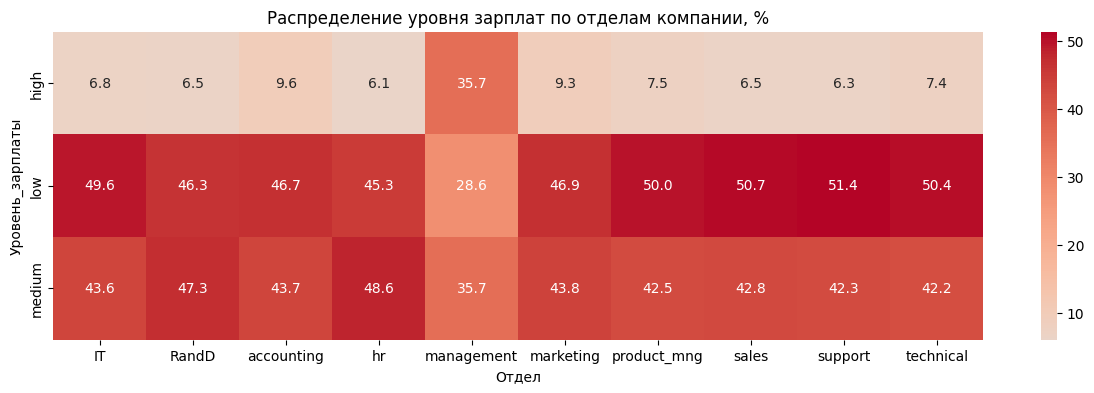

In [443]:
plt.figure(figsize=[15, 4])
sns.heatmap(HR_extr, annot=True, cmap='coolwarm', center=0.117, fmt=".1f")
plt.title("Распределение уровня зарплат по отделам компании, %")
plt.show()

**Вывод:**

Согласно полученной тепловой карте видно, что наибольшее количество высоких зарплат у сотрудников отдела "management", а наибольшее количество низких зарплат у сотрудников отдела "support".

То есть, хотя в отделе "Sales" большее количество низких и высоких заработных плат по компании (согласно предыдущей тепловой карте), однако, совокупно по компании  низкие зарплаты преобладают в отделе "support".

Данное обстоятельство связано с тем, что в отделе  "Sales" наибольшее количество сотрудников в сравнении с другими отделами, что вводит в заблуждение относительно преобладания величин наибольшей и наименьшей зарплат в отделе компании при первичном анализе данных.

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом.

Нулевая гипотеза: зависимость между окладом сотрудника и временем его нахождения на работе отсутствует.

In [267]:
HR_salary_max = HR[HR.Уровень_зарплаты == 'high']['Среднее_количество_часов']
HR_salary_max

72       149
111      289
189      156
267      129
306      149
        ... 
14829    148
14868    130
14902    159
14941    131
14980    238
Name: Среднее_количество_часов, Length: 1237, dtype: int64

In [268]:
HR_salary_min = HR[HR.Уровень_зарплаты == 'low']['Среднее_количество_часов']
HR_salary_min

0        157
3        223
4        159
5        153
6        247
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: Среднее_количество_часов, Length: 7316, dtype: int64

Для сравнения дисперсий используем эмпирическое правило дисперсии:

если отношение большей дисперсии к меньшей дисперсии меньше 4, мы можем предположить, что дисперсии примерно равны.

дисперсия для времени, проведенного на работе сотрудником с высоким окладом,  = 2274,45

дисперсия для времени, проведенного на работе сотрудником с низким окладом,  = 2583,56

отношение большей дисперсии выборки к меньшей дисперсии выборки = 1,14 < 4

Проверим нормальность распределения данных, используя функцию.

In [333]:
from scipy.stats import shapiro

def check_normality(data):

    stat, p = shapiro(data)
    print('stat = %.5f, p = %.5f\n' % (stat, p))

    if p <= 0.05:
        print("Вероятно, данные распределены не нормально")
    else:
        print("Вероятно, данные распределены нормально")

In [334]:
check_normality(HR_salary_max)

stat = 0.97121, p = 0.00000

Вероятно, данные распределены не нормально


In [335]:
check_normality(HR_salary_min)

stat = 0.95986, p = 0.00000

Вероятно, данные распределены не нормально


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Проверим нормальность распределения с помощью построения гистограммы.

Text(0.5, 1.0, 'Зависимость заработной платы сотрудника с высоким окладом от времени, проведенного им на работе')

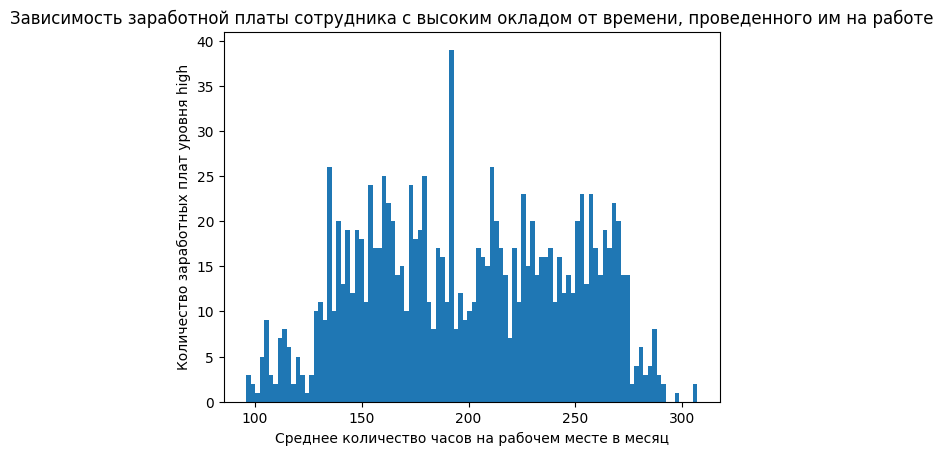

In [273]:
plt.hist(HR_salary_max, bins=100)
plt.ylabel('Количество заработных плат уровня high')
plt.xlabel('Среднее количество часов на рабочем месте в месяц')
plt.title('Зависимость заработной платы сотрудника с высоким окладом от времени, проведенного им на работе')

Text(0.5, 1.0, 'Зависимость заработной платы сотрудника с низким окладом от времени, проведенного им на работе')

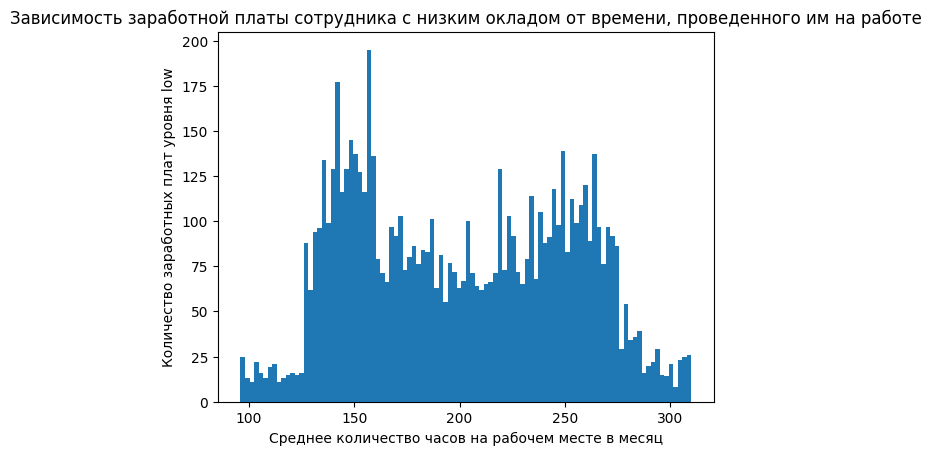

In [274]:
plt.hist(HR_salary_min, bins=100)
plt.ylabel('Количество заработных плат уровня low')
plt.xlabel('Среднее количество часов на рабочем месте в месяц')
plt.title('Зависимость заработной платы сотрудника с низким окладом от времени, проведенного им на работе')

Согласно проведенных расчетов и визуально видим, что данные распределены не нормально.

Так как распределение в выборках не нормальное, воспользуемся непараметрическим тестом Манна-Уитни.

In [275]:
import scipy.stats as st
stat, p = st.mannwhitneyu(HR_salary_max, HR_salary_min)

print(f"Статистика = {stat:.5f}, p = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу >> зависимость между окладом сотрудника и временем его нахождения на работе отсутствует')
else:
    print('Отклоняем нулевую гипотезу >> сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')

Статистика = 4507096.50000, p = 0.82413
Не отклоняем нулевую гипотезу >> зависимость между окладом сотрудника и временем его нахождения на работе отсутствует


Text(0.5, 1.0, 'Сравнение выборок по сотрудникам с низкими и высокими окладами от времени, проведенного ими на работе')

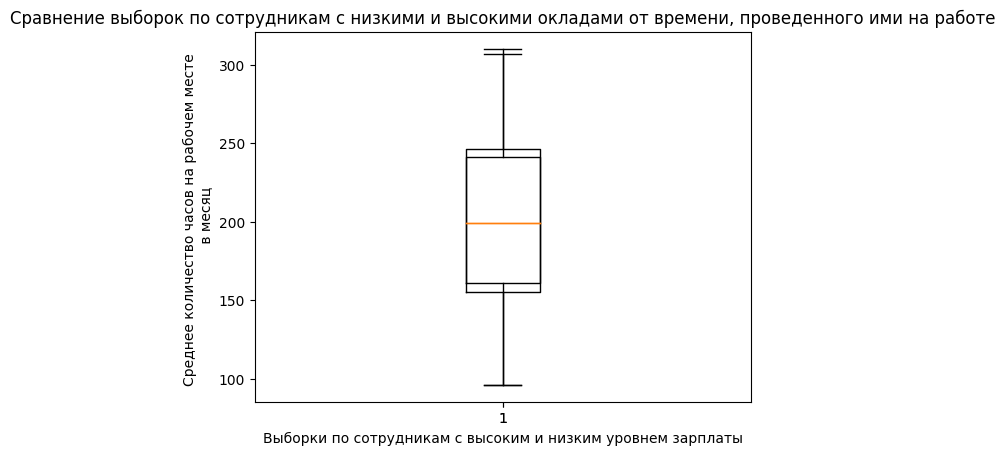

In [276]:
plt.boxplot(HR_salary_max);
plt.boxplot(HR_salary_min)
plt.xlabel('Выборки по сотрудникам с высоким и низким уровнем зарплаты')
plt.ylabel('Среднее количество часов на рабочем месте \n в месяц')
plt.title('Сравнение выборок по сотрудникам с низкими и высокими окладами от времени, проведенного ими на работе')

Согласно визуализации средние значения выборок одинаковы, а значит нулевая гипотеза подтверждается - зависимость между окладом сотрудника и временем его нахождения на работе отсутствует.

8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов

In [287]:
HR_left = (HR.groupby('Увольнение').count()['Повышение_сотрудника']).to_frame(name = 'Количество_повышений_сотрудника')
HR_left

,Количество_повышений_сотрудника
Увольнение,
0,11428
1,3571


In [288]:
HR_promotion = (HR.groupby(['Увольнение', 'Повышение_сотрудника'])['Повышение_сотрудника'].count()).to_frame(name = 'Количество_повышений_сотрудника')
HR_promotion

Количество_повышений_сотрудника
Увольнение Повышение_сотрудника                                 
0          0                                               11128
           1                                                 300
1          0                                                3552
           1                                                  19

In [289]:
HR_ = (HR_promotion['Количество_повышений_сотрудника']/HR_left['Количество_повышений_сотрудника']).to_frame(name = 'Доля сотрудников с повышением за последние 5 лет')
HR_

Доля сотрудников с повышением за последние 5 лет
Увольнение Повышение_сотрудника                                                  
0          0                                                             0.973749
           1                                                             0.026251
1          0                                                             0.994679
           1                                                             0.005321

In [290]:
HR1 = HR_.iloc [[0,1]]
HR1

Доля сотрудников с повышением за последние 5 лет
Увольнение Повышение_сотрудника                                                  
0          0                                                             0.973749
           1                                                             0.026251

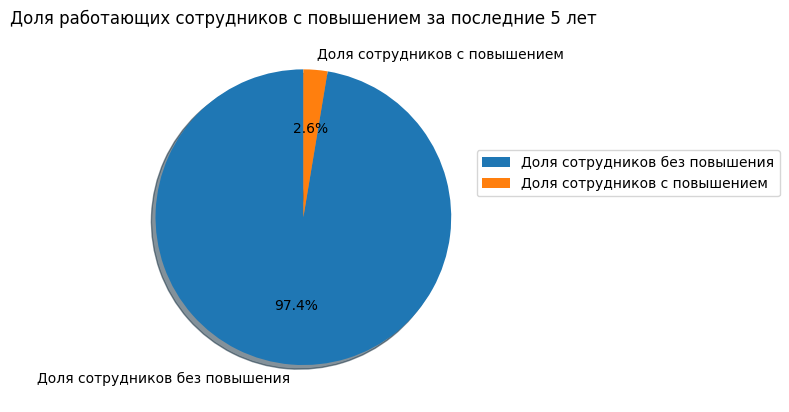

In [332]:
plt.title = 'Доля не уволившихся сотрудников с повышением за последние 5 лет'
labels = 'Доля сотрудников без повышения', 'Доля сотрудников с повышением'
sizes = HR1['Доля сотрудников с повышением за последние 5 лет']

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0)
patches, texts, auto = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set_title('Доля работающих сотрудников с повышением за последние 5 лет')
plt.legend(patches, labels,  loc='upper left', bbox_to_anchor=(0.95, 0.7))

plt.show()

In [291]:
HR2 = HR_.iloc [[2,3]]
HR2

Доля сотрудников с повышением за последние 5 лет
Увольнение Повышение_сотрудника                                                  
1          0                                                             0.994679
           1                                                             0.005321

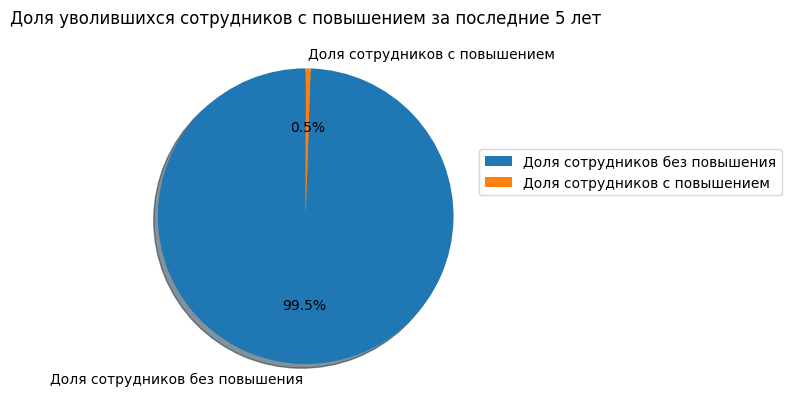

In [294]:
labels = 'Доля сотрудников без повышения', 'Доля сотрудников с повышением'
sizes = HR2['Доля сотрудников с повышением за последние 5 лет']

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0, 0)
patches, texts, auto = ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.set_title('Доля уволившихся сотрудников с повышением за последние 5 лет')
plt.legend(patches, labels,  loc='upper left', bbox_to_anchor=(0.95, 0.7))

plt.show()

Среди работающих сотрудников доля повышения за последние 5 лет больше, чем среди уволившихся.

In [295]:
HR_02 = (HR.groupby('Увольнение').mean()[['Удовлетворенность_работой', 'Кол-во_проектов']])
HR_02

<ipython-input-295-d2f419197582>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  HR_02 = (HR.groupby('Увольнение').mean()[['Удовлетворенность_работой', 'Кол-во_проектов']])


,Удовлетворенность_работой,Кол-во_проектов
Увольнение,,
0,0.666810,3.786664
1,0.440098,3.855503


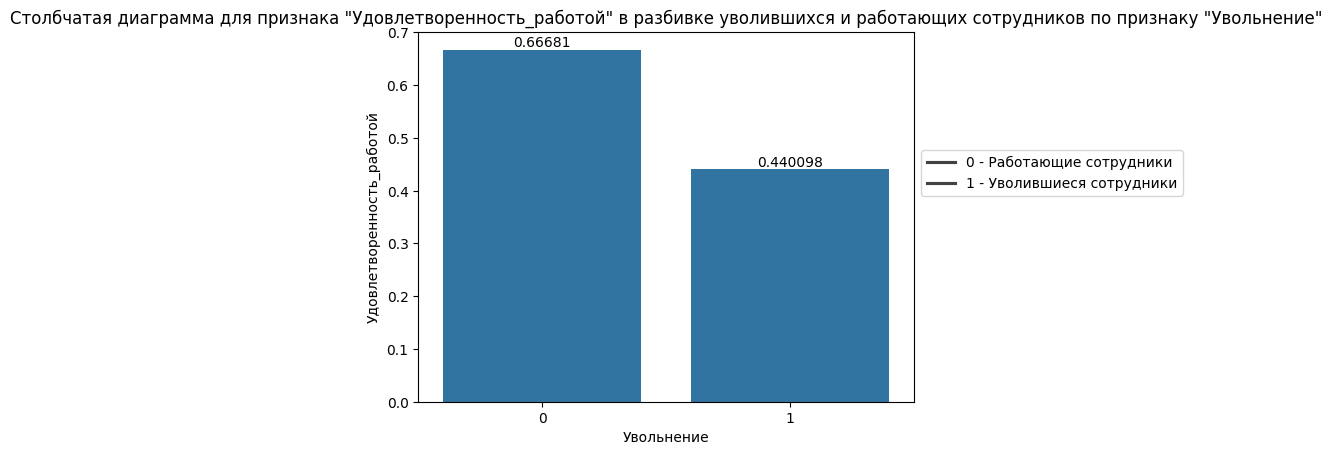

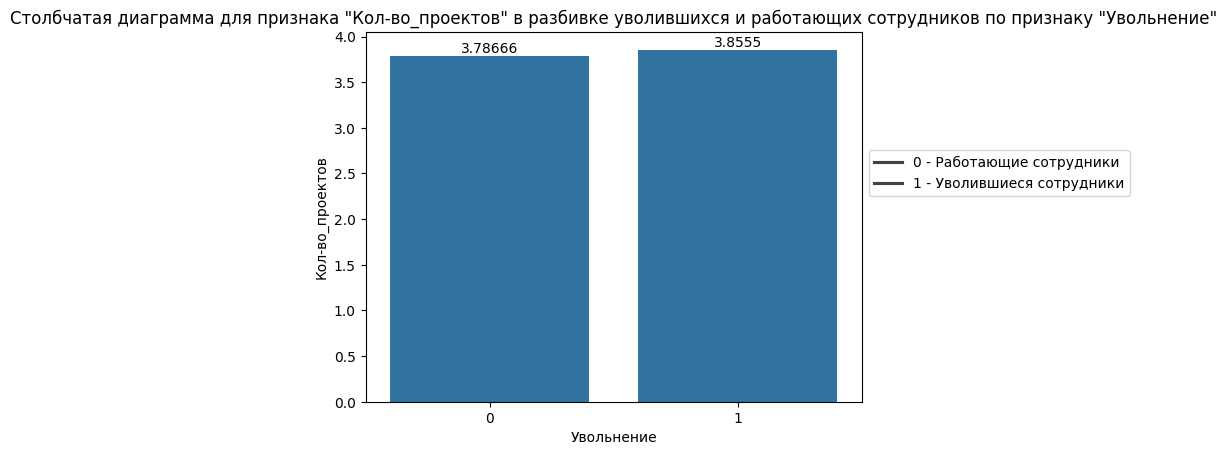

In [299]:
for col in HR_02:

    ax = sns.barplot(x= "Увольнение", y=col, data=HR_02)

    ax.bar_label(ax.containers[0])
    labels = '0 - Работающие сотрудники', '1 - Уволившиеся сотрудники'

    plt.legend(labels = labels, loc='upper left', bbox_to_anchor=(1.0, 0.7))
    plt.title(f'Столбчатая диаграмма для признака "{col}" в разбивке уволившихся и работающих сотрудников по признаку "Увольнение"')
    plt.show()


Среди уволившихся сотрудников ниже уровень удовлетворенности работой в сравнении с работающими сотрудниками.

Среднее количество проектов у уволившихся и работающих сотрудников примерно одинаково, у уволившихся - немного больше.

9. Разделить данные на тестовую и обучающую выборки.

Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).

Оценить качество модели на тестовой выборке.

In [300]:
HR_LDA = HR[['Удовлетворенность_работой', 'Последняя_оценка', 'Среднее_количество_часов', 'Кол-во_проектов', 'Стаж_работы', 'Несчастный_случай', 'Увольнение', 'Повышение_сотрудника']]
HR_LDA

,Удовлетворенность_работой,Последняя_оценка,Среднее_количество_часов,Кол-во_проектов,Стаж_работы,Несчастный_случай,Увольнение,Повышение_сотрудника
0,0.38,0.53,157,2,3,0,1,0
1,0.80,0.86,262,5,6,0,1,0
2,0.11,0.88,272,7,4,0,1,0
3,0.72,0.87,223,5,5,0,1,0
4,0.37,0.52,159,2,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151,2,3,0,1,0
14995,0.37,0.48,160,2,3,0,1,0
14996,0.37,0.53,143,2,3,0,1,0
14997,0.11,0.96,280,6,4,0,1,0


In [301]:
HR_LDA_le = np.asarray(HR_LDA['Увольнение'])
HR_LDA_le

array([1, 1, 1, ..., 1, 1, 1])

In [302]:
X = HR[['Удовлетворенность_работой', 'Последняя_оценка', 'Среднее_количество_часов', 'Кол-во_проектов', 'Стаж_работы', 'Несчастный_случай', 'Повышение_сотрудника']]
y = HR_LDA_le

In [303]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [304]:
len(y_test)

3000

In [305]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [306]:
lda = LinearDiscriminantAnalysis()

In [307]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [308]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [309]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [310]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [311]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов
# (наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [312]:
accuracy_score(y_test, lda.predict(X_test))

0.7533333333333333

In [313]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.57147175,  0.63783468,  0.00483694, -0.22366351,  0.22384028,
        -1.05220355, -1.11972289]])

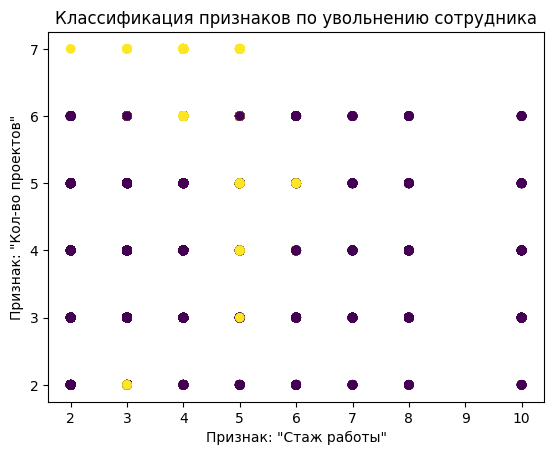

In [314]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(x=X_train["Стаж_работы"], y=X_train["Кол-во_проектов"], c=y_train)
plt.ylabel('Признак: "Кол-во проектов"')
plt.xlabel('Признак: "Стаж работы"')
plt.title("Классификация признаков по увольнению сотрудника")
plt.show()

Точность модели невысокая, т.к. факторы, принятые в расчет, плохо сбалансированы - присутствует большой разброс значений в категориях.